### **Loading Data**




In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
path = "datasets"
# %cd "/content/drive/MyDrive/AY23_24_sem2_CS180/Project/datasets"

In [14]:
ls

 Volume in drive G is Documents
 Volume Serial Number is D656-E5E0

 Directory of g:\Desktop\School\UP\UP AY 2023-2024 Sem 2\CS 180\Project\CS180proj\CS180project

22/05/2024  11:43 pm    <DIR>          .
22/05/2024  11:43 pm    <DIR>          ..
23/05/2024  09:19 am           581,643 CS180_Project.ipynb
22/05/2024  11:39 pm    <DIR>          datasets
               1 File(s)        581,643 bytes
               3 Dir(s)  3,134,521,995,264 bytes free


### **Importing modules**

In [15]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [16]:
print(tf.__version__)

2.16.1


### **Image Loading**

In [17]:
def display_image(image):
    img = Image.open(image)
    fig = plt.figure(figsize=(8, 6))
    plt.grid(False)
    plt.imshow(img)

In [27]:
crowd_folder = "datasets/ShanghaiTech_Crowd_Counting_Dataset/Shanghai"
cars_folder = "datasets/Car Counting.v1i.coco/"

In [28]:
display_image(crowd_folder + "/train_data/images/IMG_400.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\datasets\\ShanghaiTech_Crowd_Counting_Dataset\\Shanghai\\train_data\\images\\IMG_400.jpg'

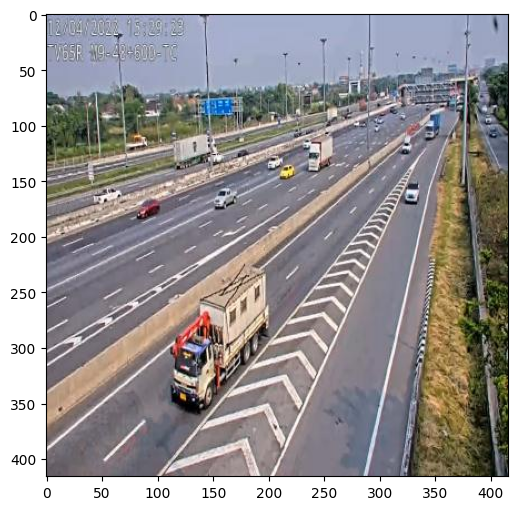

In [20]:
display_image(cars_folder + "train/TRIAL____________DOH_128_mp4-3_jpg.rf.4d38539eb6bbfdd8549cbbfb26c781be.jpg")

In [21]:
from os import listdir

In [22]:
crowd_images_train = [img for img in listdir(crowd_folder + "/train_data/images")]
crowd_images_test = [img for img in listdir(crowd_folder + "/test_data/images")]
print("Crowd Images Training:", len(crowd_images_train))
print("Crowd Images Testing:", len(crowd_images_test))

Crowd Images Training: 200
Crowd Images Testing: 300


In [23]:
cars_images_train = [img for img in listdir(cars_folder + "/train")]
cars_images_test = [img for img in listdir(cars_folder + "/test")]

cars_images_train.remove("_annotations.coco.json")
cars_images_test.remove("_annotations.coco.json")

print("Cars Images Training:", len(cars_images_train))
print("Cars Images Testing:", len(cars_images_test))

ValueError: list.remove(x): x not in list

### **Importing Image Details (Cars)**

References: https://www.kaggle.com/code/karthikeyanvijayan/coco-object-detection-dataset-in-tfrecord

In [ ]:
pip install -q pycocotools

In [ ]:
from pycocotools.coco import COCO

cars_info_train = cars_folder + "train/_annotations.coco.json"
cars_COCO_train = COCO(cars_info_train)

cars_info_test = cars_folder + "test/_annotations.coco.json"
cars_COCO_test = COCO(cars_info_test)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


In [ ]:
imgIds = cars_COCO_train.getImgIds()
print("Total images: {}".format(len(imgIds)))
rand=np.random.randint(0,len(imgIds))
img = cars_COCO_train.loadImgs(imgIds[rand])[0]
print("Image example:")
print(img)
annIds=cars_COCO_train.getAnnIds()
print("\nTotal annotations: {}".format(len(annIds)))
ann=cars_COCO_train.loadAnns(cars_COCO_train.getAnnIds(imgIds=img['id']))
print("Annotation example:")
print(ann[0])

Total images: 5536
Image example:
{'id': 1495, 'license': 1, 'file_name': 'DOH_12_mp4-24_jpg.rf.1a310019f597e8df4d2b80b2bb1e7246.jpg', 'height': 416, 'width': 416, 'date_captured': '2023-07-16T10:33:59+00:00'}

Total annotations: 31431
Annotation example:
{'id': 8348, 'image_id': 1495, 'category_id': 10, 'bbox': [185, 166, 25.5, 37.5], 'area': 956.25, 'segmentation': [], 'iscrowd': 0}


In [ ]:
cats = cars_COCO_train.loadCats(cars_COCO_train.getCatIds())
print("Number of categories: {}".format(len(cats)))
nms=[cat['name'] for cat in cats]
print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

Number of categories: 11

COCO categories: 
cc Bus Motorcyecle Pickup SUV Sedan Suv TRUCK TUCK Truck Van



### **Importing Image Details (Crowd)**

### **Model Preparation**

In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2", trainable=True)
])

print("Model loaded")

Model loaded


In [ ]:
model

In [ ]:
def car_time(carCount):
   if 0 < carCount <= 5:
        return 30
   elif 5 < carCount <= 10:
        return 60
   elif 10 < carCount <= 20:
        return 90
   elif carCount > 20:
        return 120
   
def people_time(peopleCount):
   if 0 < peopleCount <= 10:
        return 30
   elif 10 < peopleCount <= 20:
        return 45
   elif peopleCount > 20:
        return 60